Figura teorica de la imagen de Betelgeuse con 4 aperturas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import scipy
from scipy.special import jv
import re
from IPython.core.display import display, HTML
from PIL import Image
import os.path
from scipy.optimize import curve_fit
from functools import partial
import pickle
from parametros import xlimdict, xlimdef

plt.rcParams['figure.figsize'] = (5, 4)  # 8*4
plt.rcParams['figure.dpi'] = 100

C:\Users\ivian\AppData\Local\Temp\ipykernel_18196\3096429382.py:8: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
with open('intermedio/valoresr0.pkl', 'rb') as f:
    r0dict = pickle.load(f)

In [3]:
pi = np.pi
px = 5e-6  # 4.65e-6
N = 10000
a0 = 0.00003
gamma = 1
f = 2.8
r0=r0dict[8]
print(r0)

paths = []
names = []

for name in glob.glob('datos/cortes/*/*.csv'):
    paths.append(name)
    names.append(name.split('\\')[-1])
    
files=glob.glob('datos/cortes/*/*.csv')

ids = [int(n.split('-')[0]) for n in names]

0.3629309047496448


In [4]:
def calculate_I(x_rad,B,D,lamb,r0):
    paper_V=np.exp(-3.44*(B/r0)**(5/3))
    den = np.pi*x_rad*D/lamb
    paper_I=(jv(1,den)/den)**2*(1+paper_V*np.cos(2*pi/lamb*B*x_rad))
    return paper_I/paper_I.max()

In [5]:
df=pd.read_hdf('intermedio/tabla.h5', 'df')
df=df.loc[df["Imagen"]==9]
df

,Objeto,Filtro,Disco,D (mm),L (mm),L1 (mm),L2 (mm),Notas,PATH,Imagen,...,DATE,DAY,HOUR,V_media_antigua,S_antigua,S_tip_antigua,V_media,S,S_tip,E_acc
9.0,Betelgeuse,Halfa-35 nm,B/L+C,30.0,NaN,133.0,238.0,4X,datos/imagenes\Beltegeuse\9Betelgeuse0014 Bx3 ...,9,...,17-03-15,15,21:51:31,0.483885,0.015082,0.008708,0.483885,0.015082,0.008708,0.086422


In [6]:
lamb = df['$\lambda$'].values[0]*10**-9
D = df['D (mm)'].values[0]*0.001
b1=df["L1 (mm)"].values[0]/1000
b2=df["L2 (mm)"].values[0]/1000


idn = df['Imagen'].values[0]
csvpath = [file for file in files if file.find(
    '\\'+str(idn)+'-') > 0][0]
cut = pd.read_csv(csvpath)
nm = np.max(cut['Distance_(pixels)'])
nm = nm/2
m = np.linspace(-nm, nm, N)
alpha = m*px/f
alpha_as = alpha/(pi/180/3600)  # *3 cambiado en v3, mejor en cortes
x_rad=alpha_as*(pi/180/3600)


In [7]:
print(f"{b1=}\n{b2=}\n{r0=:0.3F}")

b1=0.133
b2=0.238
r0=0.363


In [8]:
r0=0.36#0.478
print(f"{r0=}")
V1=np.exp(-3.44*((b2-b1)/r0/2)**(5/3))
V2=np.exp(-3.44*((b2+b1)/r0/2)**(5/3))
V3=np.exp(-3.44*((b1)/r0)**(5/3))
V4=np.exp(-3.44*((b2)/r0)**(5/3))
print(f"{V1=}\n{V2=}\n{V3=}\n{V4=}\n")

r0=0.36
V1=0.870235925323547
V2=0.320051900636453
V3=0.5197822352365956
V4=0.1780125976921751



In [9]:
# V1=0.91
# V2=0.49
# V3=0.34
# V4=0.66

In [10]:
den = np.pi*x_rad*D/lamb
apertura=(jv(1,den)/den)**2
interferencia=(4
+4*(V1)*np.cos(pi/lamb*(b2-b1)*x_rad)
+4*(V2)*np.cos(pi/lamb*(b2+b1)*x_rad)
+2*(V3)*np.cos(2*pi/lamb*(b1)*x_rad)
+2*(V4)*np.cos(2*pi/lamb*(b2)*x_rad)
)

I_norm=apertura*interferencia
I_norm= I_norm/I_norm.max()


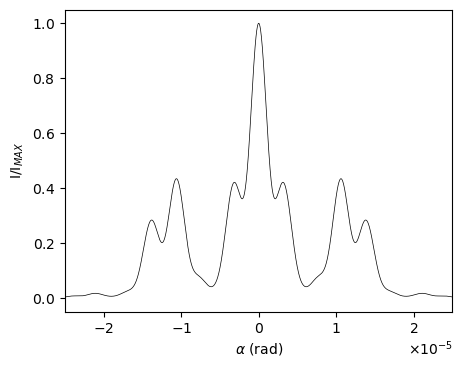

In [11]:

fig, ax = plt.subplots()
plt.ticklabel_format(useMathText=True)
x_rad=alpha_as*(pi/180/3600)
limite_x=xlimdict.get(9,xlimdef) 
plt.xlim([-limite_x, limite_x])
ax.set_xlabel('$\\alpha$ (rad)')
ax.set_ylabel('I/I$_{MAX}$')  


ax.plot(x_rad,I_norm,color="black", linewidth=0.5)

#plt.legend([f"r$_0$ = {100*r0:.0f} cm"])

plt.savefig('productos/graficas intensidad teor/Betelgeuse/'+'4openings' +'.pdf')
#plt.close()

In [12]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib widget

def plotear(V1,V2,V3,V4):
    #plt.close()
    x_rad=alpha_as*(pi/180/3600)
    den = np.pi*x_rad*D/lamb
    apertura=(jv(1,den)/den)**2
    interferencia=(4
    +4*(V1)*np.cos(pi/lamb*(b2-b1)*x_rad)
    +4*(V2)*np.cos(pi/lamb*(b2+b1)*x_rad)
    +2*(V3)*np.cos(2*pi/lamb*(b1)*x_rad)
    +2*(V4)*np.cos(2*pi/lamb*(b2)*x_rad)
    )

    I_norm=apertura*interferencia
    I_norm= I_norm/I_norm.max()

    fig, ax = plt.subplots()
    plt.ticklabel_format(useMathText=True)
    x_rad=alpha_as*(pi/180/3600)
    limite_x=xlimdict.get(9,xlimdef) 
    plt.xlim([-limite_x, limite_x])
    ax.set_xlabel('$\\alpha$ (rad)')
    ax.set_ylabel('I/I$_{MAX}$')  


    ax.plot(x_rad,I_norm,color="black", linewidth=0.5)
    return plt.show()

In [13]:
%matplotlib widget

interact(plotear, V1 = widgets.FloatSlider(value=1,
                                               min=0.001,
                                               max=1,
                                               step=0.01), 
                  V2 = widgets.FloatSlider(value=1,
                                               min=0.001,
                                               max=1,
                                               step=0.01), 
                  V3 = widgets.FloatSlider(value=1,
                                               min=0.001,
                                               max=1,
                                               step=0.01), 
                  V4 = widgets.FloatSlider(value=1,
                                               min=0.001,
                                               max=1,
                                               step=0.01));

interactive(children=(FloatSlider(value=1.0, description='V1', max=1.0, min=0.001, step=0.01), FloatSlider(val…